<a href="https://colab.research.google.com/github/RohanTakey/Project---Climate-change-Forecasting-using-Deep-Learning/blob/main/Capstone2_Climate_change_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Capstone Project 2</center> 
---
## <center> Climate Change Analysis using Deep Learning</center>
**<center>Rohan Takey <center>**
<center>rohantakey246@gmail.com</center> 

![image](https://wallpapercave.com/wp/wp4078364.jpg)

### <center>Overview</center>
* **Basic Idea :**<br>
Climate change is one of the most concerning problem in the world.The basic mechanics of climate change are simple: Carbon dioxide in the atmosphere traps heat. More carbon dioxide means more heat is trapped across the Earth, causing it to warm up. And the temperature is gradually increasing.Machine learning can be used to predict this time dependant variable. Also the temeprature is affected by other environmental factors like Humidity,Wind speed, Density of air and others. So over machine learning, Deep learning can be handfull for better predictions.
   **The time series climate change forcasting model can be used to forecast Temprature for future for specific time period**

* **Objective :**<br>Neural Networks in deep learning can be used to detect the pattern in the historical data and can be useful to create a prediction.Utilizing the Data analysing and Machine Learning to forecast climate change.<br>


* **Problem Statement :**<br>TIme series analysis of climate change .


* **Motivation :**<br>Weather forcasting is basic every day foreasting we see on television or any brodcasting media.a curiosity about how prediction is done, can be usefull to learn.Applying machine learning to analysis data and learn the pattern is intresting to learn. 


* **Project Scope :**<br>This  project will analyise the historical data of climate data of Jena (Germany) city, take insight from that data to understand more about how climate is changing over the years by the view of temprature. At the last stage of project will be creating a deep learning model that understand this problem to give us desired output.


* **Working Methodology :**
    - Primary Task is to Understand Data and finding anomalies in data.
    - Feature Engineering.
    - Exploratory data analysis.
    - Model Preprocessing.
    - Neural Network model building.
    - Model Evaluation.
    - Forecasting.
    
* **Data Collection**
    - link for the dataset is [here]('https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip')


* **Technical Aspect :**<br>
    - [Python v1.2.4](https://www.python.org/) Programming Langauge for this Notebook.
    - [Pandas v1.21.2](https://pandas.pydata.org/) Python Data Analysis Library.
    - [Sklearn v0.24.2](https://scikit-learn.org/stable/) Machine Learning handling in Python. 
    - [Matplotlib v3.4.2](https://matplotlib.org/) creating static, animated, and interactive visualizations in Python.
    - [Seaborn v0.11.1](https://seaborn.pydata.org/) Python data Visulization based on matplotlib.
    - [Statsmodels 0.12.2](https://www.statsmodels.org/stable/index.html)  Statsmodels is another machine learning library for python.
    - [Tensorflow 2.7.0](https://www.tensorflow.org/) Tensorflow is a Deep learning library that handles many of the deep learning problems.

### <center>INDEX</center>

* [**Data Preprocessing**](#Data-Preprocessing)
    * [Prerequisite](#Prerequisite)
    * [Statistical Analysis-The Data](#Statistical-Analysis-The-Data)
* [**EDA And Visulization**](#EDA-And-Visulization)
* [**Time Series Feature Engineering**](#Time-Series-Feature-Engineering)
* [**Nueral Network Models**](#Nueral-Network-Models)
    * [Long Short-Term Memory - LSTM Networks](#Long-Short-Term-Memory---LSTM-Networks)
    * [Convolutional Neural Network - CNN](#Convolutional-Neural-Network---CNN)
    * [Gated Recurrent Unit - GRU](#Gated-Recurrent-Unit---GRU)
    
* [**Summary**](#Summary)
* [**Conclusion**](#Conclusion)
* [**Future Scope**](#Future-Scope)
* [**Reference**](#Reference)

### <center>Data Preprocessing</center>

#### Prerequisite

In [1]:
## Installing Prerequisites (uncomment to install)
#!pip install pandas
#!pip install numpy
#!pip install tensorflow
#!pip install matplotlib
#!pip install seaborn

In [2]:
# Libraries For data Handling
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import warnings

# Data Stationarity checking 

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Deep Learning Libraries 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse

# Setting Defaults for this notebook

%matplotlib inline 
plt.rcParams['font.size']=15 # Font size of all fonts in plot
plt.style.use('seaborn-darkgrid') # Plot background style
palette=sns.color_palette('husl',10) # color pallete for multicolor plot
warnings.filterwarnings('ignore')




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# downloading data
file = tf.keras.utils.get_file(origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
                                   fname='jena_climate_2009_2016.csv.zip',
                                   extract=True)
file_path, _ = os.path.splitext(file)

13582336/13568290 [==============================] - 0s 0us/step


In [4]:
# downloading data
df = pd.read_csv(file_path)

#### Statistical Analysis-The Data

In [5]:
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [6]:
# Shape of dataframe
df.shape

(420551, 15)

In [7]:
# changing datetime feature as a index
df.index=pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')

  **Attribute Information**
  * **"Pressure","p (mbar)"**
  * **"Temperature","T (degC)"**
  * "Temperature in Kelvin",
  * "Temperature (dew point)",
  * "Relative Humidity","rh (%)"
  * "Saturation vapor pressure",
  * "Vapor pressure",VPact (mbar)
  * "Vapor pressure deficit",
  * **"Specific humidity",sh (g/kg)**
  * "Water vapor concentration", H2OC (mmol/mol)
  * **"Airtight", 'rho (g/m^3)'**
  * **"Wind speed", wv (m/s)**
  * "Maximum wind speed",
  * "Wind direction in degrees",

**From all the features available in the data, there are relative paramters and absolute parameters.For creating Multivariate time series model I have choosen some of the paramters form data like : Pressure,Specific Humidity, Density, Wind speed** 

In [8]:
# Choosing important features
df2=df[['T (degC)','p (mbar)','rho (g/m**3)','sh (g/kg)']]#,'H2OC (mmol/mol)',,'wv (m/s)',"rh (%)",'VPact (mbar)']]
df2

,T (degC),p (mbar),rho (g/m**3),sh (g/kg)
Date Time,,,,
2009-01-01 00:10:00,-8.02,996.52,1307.75,1.94
2009-01-01 00:20:00,-8.41,996.57,1309.80,1.89
2009-01-01 00:30:00,-8.51,996.53,1310.24,1.88
2009-01-01 00:40:00,-8.31,996.51,1309.19,1.92
2009-01-01 00:50:00,-8.27,996.51,1309.00,1.92
...,...,...,...,...
2016-12-31 23:20:00,-4.05,1000.07,1292.98,2.06
2016-12-31 23:30:00,-3.35,999.93,1289.44,2.07
2016-12-31 23:40:00,-3.16,999.82,1288.39,2.05


In [9]:
# Removing duplicate dates in index
df2 = df2.loc[~df2.index.duplicated(),:]

In [10]:
# The frequency of index is of 10 min
# We change it to hourly basis
#df3=df2.asfreq('H')
df3=df2[:420223]

In [11]:
# Final Dataset
df3

,T (degC),p (mbar),rho (g/m**3),sh (g/kg)
Date Time,,,,
2009-01-01 00:10:00,-8.02,996.52,1307.75,1.94
2009-01-01 00:20:00,-8.41,996.57,1309.80,1.89
2009-01-01 00:30:00,-8.51,996.53,1310.24,1.88
2009-01-01 00:40:00,-8.31,996.51,1309.19,1.92
2009-01-01 00:50:00,-8.27,996.51,1309.00,1.92
...,...,...,...,...
2016-12-31 23:10:00,-3.93,1000.11,1292.41,2.06
2016-12-31 23:20:00,-4.05,1000.07,1292.98,2.06
2016-12-31 23:30:00,-3.35,999.93,1289.44,2.07


In [12]:
df3.head(8)

,T (degC),p (mbar),rho (g/m**3),sh (g/kg)
Date Time,,,,
2009-01-01 00:10:00,-8.02,996.52,1307.75,1.94
2009-01-01 00:20:00,-8.41,996.57,1309.80,1.89
2009-01-01 00:30:00,-8.51,996.53,1310.24,1.88
2009-01-01 00:40:00,-8.31,996.51,1309.19,1.92
2009-01-01 00:50:00,-8.27,996.51,1309.00,1.92
2009-01-01 01:00:00,-8.05,996.50,1307.86,1.96
2009-01-01 01:10:00,-7.62,996.50,1305.68,2.04
2009-01-01 01:20:00,-7.62,996.50,1305.69,2.03


In [13]:
# Dataset Distribution
df3.describe()

,T (degC),p (mbar),rho (g/m**3),sh (g/kg)
count,420223.000000,420223.000000,420223.000000,420223.000000
mean,9.442455,989.214132,1216.097614,6.021512
std,8.421116,8.360882,39.967792,2.656039
min,-23.010000,913.600000,1059.450000,0.500000
25%,3.360000,984.200000,1187.540000,3.920000
50%,9.400000,989.580000,1213.830000,5.590000
75%,15.460000,994.730000,1242.790000,7.800000
max,37.280000,1015.350000,1393.540000,18.130000


In [14]:
# Null Checking 
df3.isnull().sum()

T (degC)        0
p (mbar)        0
rho (g/m**3)    0
sh (g/kg)       0
dtype: int64

In [15]:
# Dataframe informtion
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420223 entries, 2009-01-01 00:10:00 to 2016-12-31 23:50:00
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   T (degC)      420223 non-null  float64
 1   p (mbar)      420223 non-null  float64
 2   rho (g/m**3)  420223 non-null  float64
 3   sh (g/kg)     420223 non-null  float64
dtypes: float64(4)
memory usage: 16.0 MB


In [16]:
# Seprating Dates for future prediction purpose
dates=df3.index


### <center>Exploratory Data Analysis</center>

In [17]:
# creating a copy for visulization
new_df=df3.copy()
new_df['month']=new_df.index.month
new_df['year']=new_df.index.year

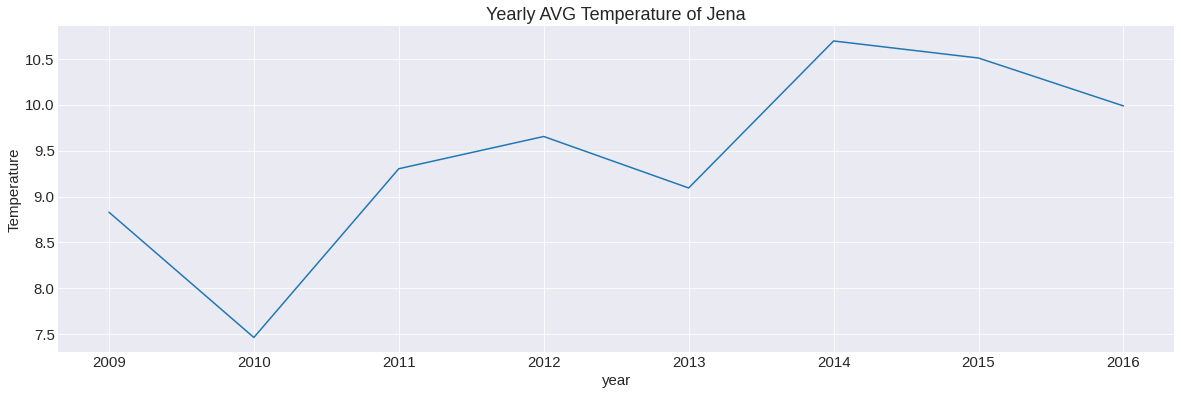

In [18]:
#Yearly Average Temprature analysis
year_avg = pd.pivot_table(new_df, values='T (degC)', index='year', aggfunc='mean')
year_avg['T (degC)'].plot(figsize=(20,6))
plt.title('Yearly AVG Temperature of Jena')
plt.xlabel('year')
plt.ylabel('Temperature')
plt.show()

**Take Away :**
* Over years average Temprature is gradually increasing.
* 2010 has observed to be lowest average temprature in series.
* The difference is very less as around 1 deg C.but it increasing.

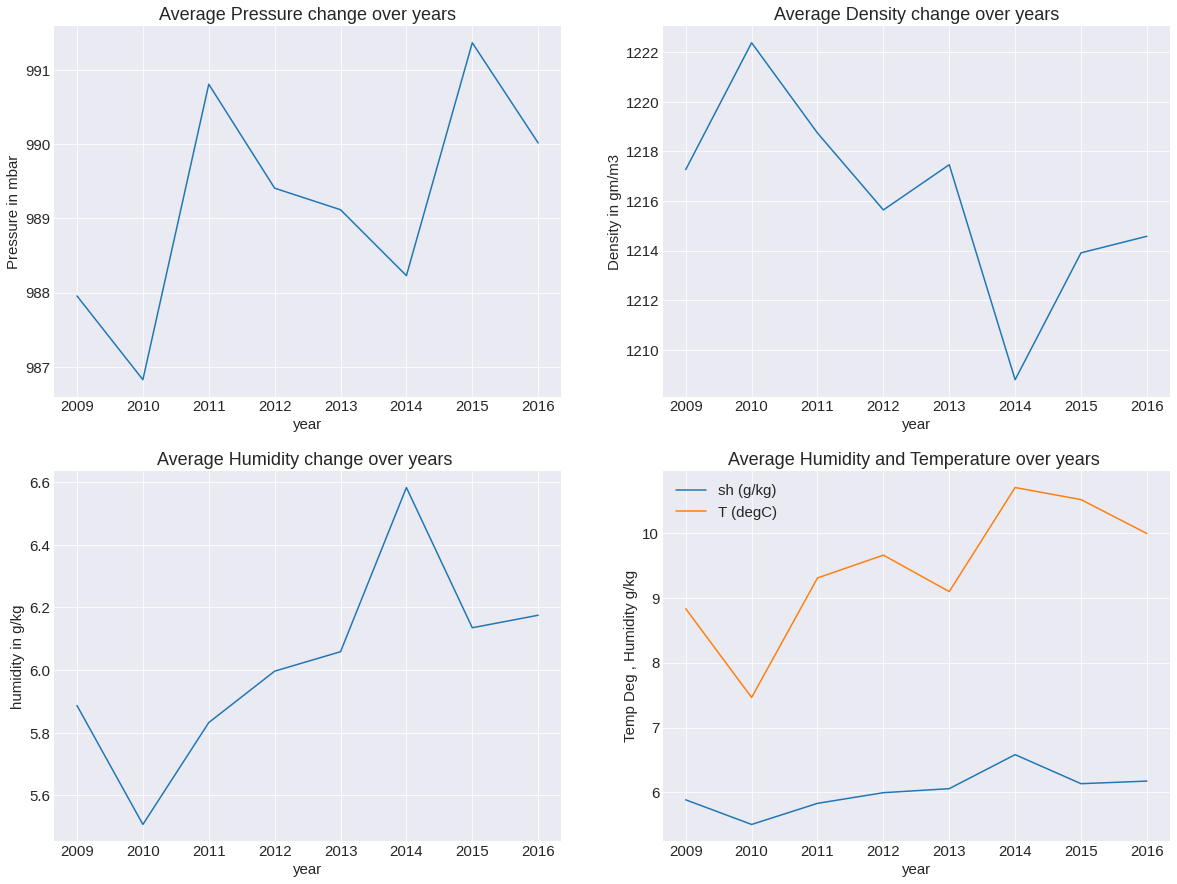

In [80]:
# All variable changes over year.
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
year_avg = pd.pivot_table(new_df, values='p (mbar)', index='year', aggfunc='mean')
year_avg['p (mbar)'].plot(title="Average Pressure change over years",ylabel='Pressure in mbar')

plt.subplot(2,2,2)
year_avg = pd.pivot_table(new_df, values='rho (g/m**3)', index='year', aggfunc='mean')
year_avg['rho (g/m**3)'].plot(title="Average Density change over years",ylabel='Density in gm/m3')

plt.subplot(2,2,3)
#year_avg = pd.pivot_table(new_df, values='wv (m/s)', index='year', aggfunc='mean')
#year_avg['wv (m/s)'].plot(title="Average Wind speed over years",ylabel='wind speed in m/s')
year_avg = pd.pivot_table(new_df, values='sh (g/kg)', index='year', aggfunc='mean')
year_avg['sh (g/kg)'].plot(title="Average Humidity change over years ",ylabel='humidity in g/kg')

plt.subplot(2,2,4)
year_avg = pd.pivot_table(new_df, values=['sh (g/kg)','T (degC)'], index='year', aggfunc='mean')
year_avg['sh (g/kg)'].plot(title="Average Humidity and Temperature over years ",ylabel='humidity in g/kg')

year_avg['T (degC)'].plot(title="Average Humidity and Temperature over years ",ylabel='Temp Deg , Humidity g/kg')
plt.legend()
plt.show()

**Take Away**
* All the atmospheric parameters are according to the temprature data.
* Here Autospheric average pressure is increasing but in very slow manner with increase in temprature.
* Humidity can be directly related with the temprature change. as temprature increasing over years , humidity change can be observed.

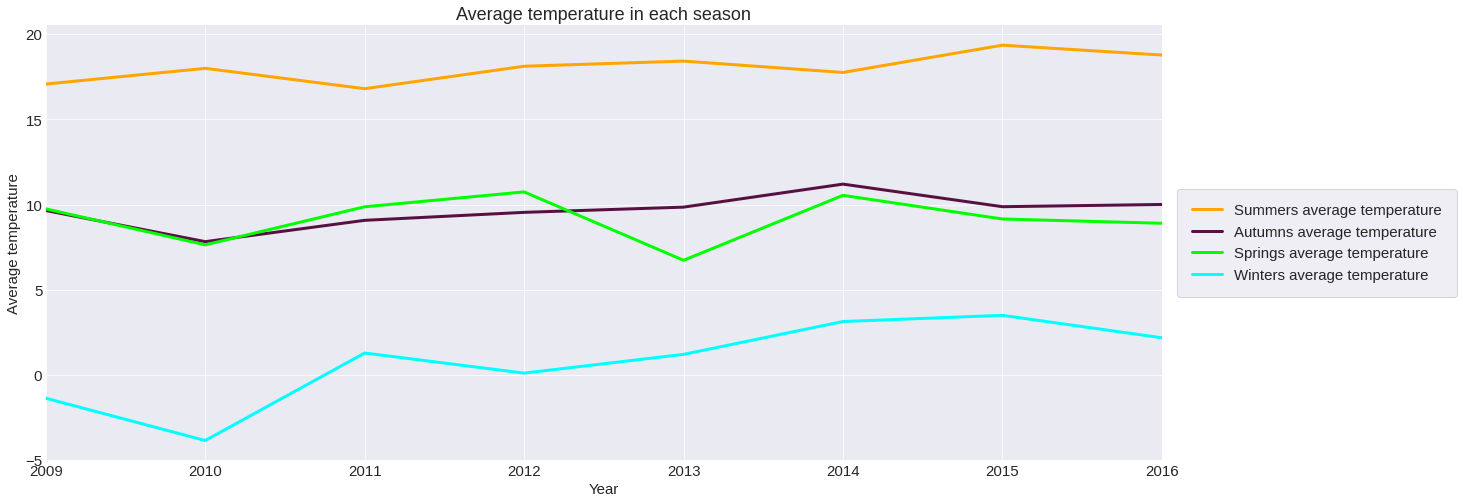

In [20]:
# Season wise average temprature
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

min_year = new_df['year'].min()
max_year = new_df['year'].max()
years = range(min_year, max_year + 1)
new_df['season'] = new_df['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = new_df[new_df['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['T (degC)'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['T (degC)'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['T (degC)'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['T (degC)'].mean())

#sns.set(style="whitegrid")
#sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(20, 8))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange',linewidth=3.0)
plt.plot(years, autumn_temps, label='Autumns average temperature', color='#580F41',linewidth=3.0)
plt.plot(years, spring_temps, label='Springs average temperature', color='#00FF00',linewidth=3.0)
plt.plot(years, winter_temps, label='Winters average temperature', color='#00FFFF',linewidth=3.0)

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

**Take Away**
* The seasonality plot of temprature shows expected plot as summer having higher temprature above 15 deg C in each year.
* Auntum and spring has around 10deg C temprature.
* Winter season records for lowest temprature in the time series.
* Each year in winter season the temprature drops to below 5 deg C.
* Most crucial point is, for winter season the temprature is increasing at higher rate than other season.
* That shows climate change is happening.

**Checking for stationarity**<br>
<br>
Stationarity is an important concept in the field of time series analysis with tremendous influence on how the data is perceived and predicted. When forecasting or predicting the future, most time series models assume that each point is independent of one another. The best indication of this is when the dataset of past instances is stationary. For data to be stationary, the statistical properties of a system do not change over time. This does not mean that the values for each data point have to be the same, but the overall behavior of the data should remain constant. From a purely visual assessment, time plots that do not show trends or seasonality can be considered stationary. More numerical factors in support of stationarity include a constant mean and a constant variance.

In [21]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):

  "Use Series as parameter"
    
  # Creating plots of the DF
  y = pd.Series(y)
  fig = plt.figure()

  ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
  ax2 = plt.subplot2grid((3, 3), (1, 0))
  ax3 = plt.subplot2grid((3, 3), (1, 1))
  ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

  y.plot(ax=ax1, figsize=figsize)
  ax1.set_title('Jena Temperature Variation')
  plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
  plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
  sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
  ax4.set_title('Distribution Chart')
  plt.tight_layout()

  #series = data['Passengers'].values
    
  # ADF Test
  result = adfuller(y, autolag='AIC')
  #Extracting the values from the results:

  print('ADF Statistic: %f' % result[0])

  print('p-value: %f' % result[1])

  print('Critical Values:')

  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
  else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")


# Another way to get all the Dickey fuller test paramters
  #print('Results of Dickey-Fuller Test:')
  #adfinput = adfuller(y)
  #adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  #adftest = round(adftest,4)
    
  #for key, value in adfinput[4].items():
   # adftest["Critical Value (%s)"%key] = value.round(4)
        
  #print(adftest)
    
  #if adftest[0].round(2) < adftest[5].round(2):
   # print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe serie seems to be stationary')
  #else:
   #   print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe serie isn't stationary")

ADF Statistic: -8.253647
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


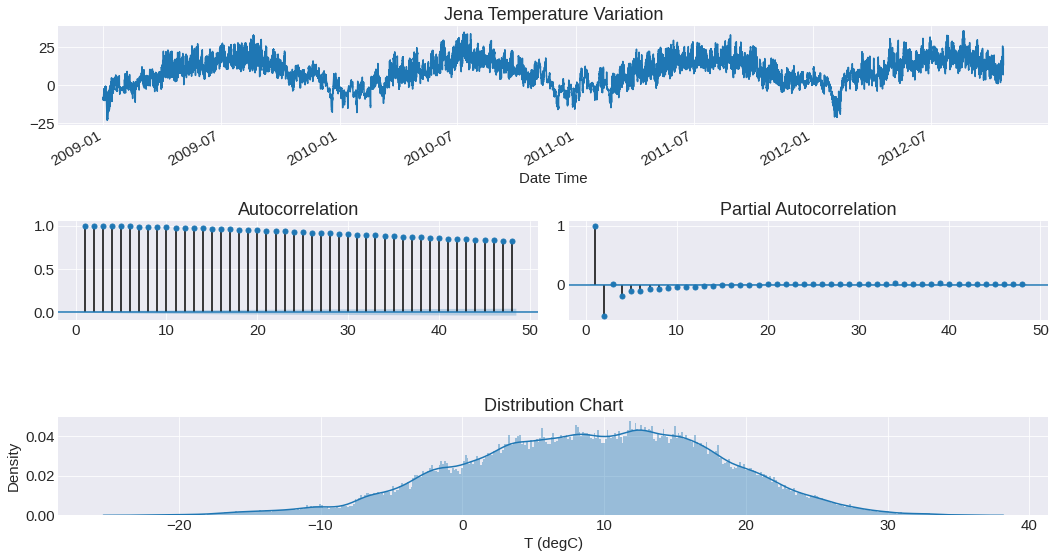

In [22]:
check_stationarity(new_df['T (degC)'][:200000])

**Take Away**
* **Time series is stationary** hence no differencing of data  is required to perform time series analysis.
* The Temprature variation plot shows a seasonal trend in the data.
* With refrence to the average temprature plot, though the seasonality is present, the average temprature is rising.
* If the ACF (Autocorrelation) plot declines gradually and the PACF (Partial Autocorrelation) plot drops instantly, This shows Regressive model can be used to timeseries analysis.
* The Temprature is normally distributed, hence an regressive model can be used without transformation of feature.

### <center>Time Series Feature Engineering</center>

In [26]:
# Creating Functions of time series data :
# Splitting data into X and Y 
# creating arrays of features and target.
# Window shows features of 6 hours and 7 one is we will predict based on first six
def df_to_X_Y(df,window_size=6):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label=df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X),np.array(y)

In [27]:
# Shape of target and other variables
X,y=df_to_X_Y(df3)
X.shape,y.shape

((420217, 6, 4), (420217,))

In [28]:
# Splitting data to train, val and testing sets
X_train,y_train=X[:300000],y[:300000]
X_val,y_val=X[300000:400000],y[300000:400000]
X_test,y_test=X[400000:],y[400000:]
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((300000, 6, 4), (300000,), (100000, 6, 4), (100000,), (20217, 6, 4), (20217,))

In [29]:
X_train

array([[[  -8.02,  996.52, 1307.75,    1.94],
        [  -8.41,  996.57, 1309.8 ,    1.89],
        [  -8.51,  996.53, 1310.24,    1.88],
        [  -8.31,  996.51, 1309.19,    1.92],
        [  -8.27,  996.51, 1309.  ,    1.92],
        [  -8.05,  996.5 , 1307.86,    1.96]],

       [[  -8.41,  996.57, 1309.8 ,    1.89],
        [  -8.51,  996.53, 1310.24,    1.88],
        [  -8.31,  996.51, 1309.19,    1.92],
        [  -8.27,  996.51, 1309.  ,    1.92],
        [  -8.05,  996.5 , 1307.86,    1.96],
        [  -7.62,  996.5 , 1305.68,    2.04]],

       [[  -8.51,  996.53, 1310.24,    1.88],
        [  -8.31,  996.51, 1309.19,    1.92],
        [  -8.27,  996.51, 1309.  ,    1.92],
        [  -8.05,  996.5 , 1307.86,    1.96],
        [  -7.62,  996.5 , 1305.68,    2.04],
        [  -7.62,  996.5 , 1305.69,    2.03]],

       ...,

       [[  15.81,  992.18, 1187.95,   11.29],
        [  15.87,  992.2 , 1187.7 ,   11.32],
        [  15.95,  992.23, 1187.38,   11.35],
        [  16. 

In [30]:
# Scaling data using standerdization

# Preprocessing data
training_mean=np.mean(X_train[:,:,0])
training_std=np.std(X_train[:,:,0])


def preprocessing(X):
  X[ : , : , 0] = (X[ : , : , 0]-training_mean) / training_std
  return X


In [31]:
# Creating scaled datasets
X_train_scaled=preprocessing(X_train)
X_val_scaled=preprocessing(X_val)
X_test_scaled=preprocessing(X_test)

### <center>Neural Network Models</center>

#### Deep Learning Introduction<br>


Deep Learning Algorithms use something called a neural network to find associations between a set of inputs and outputs. The basic structure is seen below:

<p align="center">
  <img src="https://miro.medium.com/max/700/0*C_nYHONjxjUVgIYh" alt="Neural network architecture"/>
   <br>
  <em>Neural network architecture</em>
</p>


With the recent breakthroughs that have been happening in data science, it is found that for almost all of these sequence prediction problems, Long short Term Memory networks, a.k.a LSTMs have been observed as the most effective solution.

LSTMs have an edge over conventional feed-forward neural networks and RNN in many ways. This is because of their property of selectively remembering patterns for long durations of time.  <br>
In short:<br>
- Deep Learning refers to Deep Neural Networks.
- Deep Neural Networks find associations between a set of inputs and outputs.
- Back propagation is something that’s used to update the parameters of a Neural Network.

**Basic of RNN**<br>
Example of sequential data, which can be climate change data for a particular city. A simple machine learning model or an Artificial Neural Network may learn to predict the temprature,pressure or any other wheather variable based on a number of features:Density value , humidity , wind speed etc. While the temprature of that day based on these features, it is also largely dependent on the climate conditions on the previous days. In fact for a climate condition, these values in the previous days is one major deciding factor for predictions.

In the conventional feed-forward neural networks, all test cases are considered to be independent. That is when fitting the model for a particular day, there is no consideration for the climate change on the previous days.
Dependency on time is achieved via Recurrent Neural Networks. A typical RNN looks like<br>


<p align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/12/05231650/rnn-neuron-196x300.png" alt="RNN process"/>

  <br>
  <em>RNN processe</em>
</p>


**RNN Limitations**<br>

The limitation of RNN is  the problem of Vanishing Gradient. In order to understand this,we will see how feed-forward neural network works. We know that for a conventional feed-forward neural network, the weight updating that is applied on a particular layer is a multiple of the learning rate, the error term from the previous layer and the input to that layer. Thus, the error term for a particular layer is somewhere a product of all previous layers' errors. When dealing with activation functions like the sigmoid function, the small values of its derivatives (occurring in the error function) gets multiplied multiple times as we move towards the starting layers. As a result of this, the gradient almost vanishes as we move towards the starting layers, and it becomes difficult to train these layers.

A similar case is observed in Recurrent Neural Networks. RNN remembers things for just small durations of time, i.e. if we need the information after a small time it may be reproducible, but once a lot of information are fed in, this information gets lost somewhere. This issue can be resolved by applying a slightly tweaked version of RNNs – the Long Short-Term Memory Networks.<br>





#### Long Short-Term Memory - LSTM Networks



LSTM can be considerd as improvement over RNN beacause in order to add a new information, it transforms the existing information completely by applying a function. Because of this, the entire information is modified, on the whole, i. e. there is no consideration for 'important' information and 'not so important' information.
Turns out that an RNN doesn't do so.

LSTMs on the other hand, make small modifications to the information by multiplications and additions. With LSTMs, the information flows through a mechanism known as cell states. This way, LSTMs can selectively remember or forget things. The information at a particular cell state has three different dependencies.

In [32]:
# Model 1 LSTM Model
model1=Sequential()
model1.add(InputLayer((6,4)))
model1.add(LSTM(64))#, activation='relu', return_sequences=True))
#model1.add(LSTM(32, activation='relu', return_sequences=False))
#model1.add(Dropout(0.2))
#model1.add(BatchNormalization())
#model1.add(Dense(32))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))
model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17664     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,193
Trainable params: 18,193
Non-trainable params: 0
_________________________________________________________________


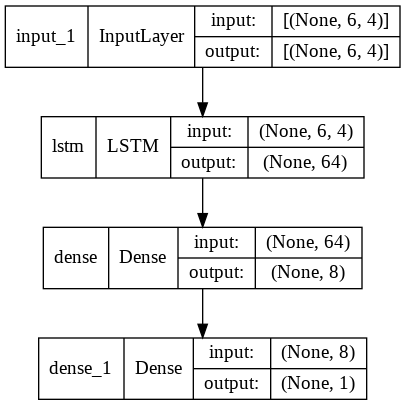

In [33]:
# Plotting network
plot_model(model1,to_file='model1_plot.png', show_shapes=True)

In [34]:
# Setting callbacks and compiling model
cp1=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])
#from keras.optimizers import RMSprop

In [35]:
# Setting model
history1=model1.fit(X_train_scaled,y_train,validation_data=(X_val_scaled,y_val),epochs=10,callbacks=[cp1])

Epoch 1/10
9374/9375 [============================>.] - ETA: 0s - loss: 63.2876 - root_mean_squared_error: 7.9554

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 61s 6ms/step - loss: 63.2818 - root_mean_squared_error: 7.9550 - val_loss: 6.5401 - val_root_mean_squared_error: 2.5574
Epoch 2/10
9374/9375 [============================>.] - ETA: 0s - loss: 1.3955 - root_mean_squared_error: 1.1813

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 54s 6ms/step - loss: 1.3954 - root_mean_squared_error: 1.1813 - val_loss: 0.2906 - val_root_mean_squared_error: 0.5390
Epoch 3/10
9369/9375 [============================>.] - ETA: 0s - loss: 0.2068 - root_mean_squared_error: 0.4547

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 55s 6ms/step - loss: 0.2067 - root_mean_squared_error: 0.4547 - val_loss: 0.1689 - val_root_mean_squared_error: 0.4110
Epoch 4/10
9374/9375 [============================>.] - ETA: 0s - loss: 0.1580 - root_mean_squared_error: 0.3975

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 56s 6ms/step - loss: 0.1580 - root_mean_squared_error: 0.3975 - val_loss: 0.1365 - val_root_mean_squared_error: 0.3695
Epoch 5/10
9375/9375 [==============================] - 54s 6ms/step - loss: 0.1357 - root_mean_squared_error: 0.3684 - val_loss: 0.1403 - val_root_mean_squared_error: 0.3745
Epoch 6/10
9367/9375 [============================>.] - ETA: 0s - loss: 0.1165 - root_mean_squared_error: 0.3413

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 57s 6ms/step - loss: 0.1165 - root_mean_squared_error: 0.3414 - val_loss: 0.0999 - val_root_mean_squared_error: 0.3161
Epoch 7/10
9368/9375 [============================>.] - ETA: 0s - loss: 0.0998 - root_mean_squared_error: 0.3158

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 56s 6ms/step - loss: 0.0998 - root_mean_squared_error: 0.3158 - val_loss: 0.0962 - val_root_mean_squared_error: 0.3101
Epoch 8/10
9370/9375 [============================>.] - ETA: 0s - loss: 0.0894 - root_mean_squared_error: 0.2990

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 56s 6ms/step - loss: 0.0894 - root_mean_squared_error: 0.2990 - val_loss: 0.0921 - val_root_mean_squared_error: 0.3035
Epoch 9/10
9366/9375 [============================>.] - ETA: 0s - loss: 0.0819 - root_mean_squared_error: 0.2862

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 57s 6ms/step - loss: 0.0819 - root_mean_squared_error: 0.2862 - val_loss: 0.0851 - val_root_mean_squared_error: 0.2917
Epoch 10/10
9366/9375 [============================>.] - ETA: 0s - loss: 0.0782 - root_mean_squared_error: 0.2797

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


9375/9375 [==============================] - 60s 6ms/step - loss: 0.0782 - root_mean_squared_error: 0.2796 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2616


In [36]:
# Choosing best model
model1=load_model('model1/')

In [37]:
# Plotting relation of train and validation loss
def train_val_loss_plot(model_history):
  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.figure(figsize=(14,8))
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  return

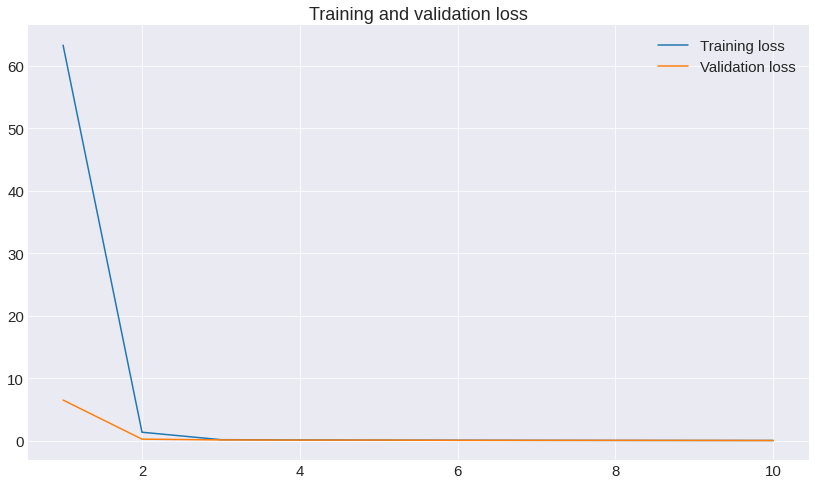

In [38]:
# Plot training and validation
train_val_loss_plot(history1)

In [39]:
# Error/ residual analysis and model performance
def model_performance(model,X,y, figsize=(20,8),start=0,end=100):
    predictions=model.predict(X).flatten()
    data=pd.DataFrame(data={"Temp":y,'Pred':predictions})
    data['Error'] = data['Temp'] -data['Pred']
    RMSE=sqrt(mse(y,predictions))

    print(f"The Root Mean Squared Error Of model prediction is :{RMSE}")
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[start:end,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[start:end,1], data.iloc[start:end,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')

    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)

    # Autocorrelation plot of the residual
    plot_acf(data.iloc[start:end,2], lags=(len(data.iloc[start:end,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()
    return RMSE

The Root Mean Squared Error Of model prediction is :0.26266103827918297


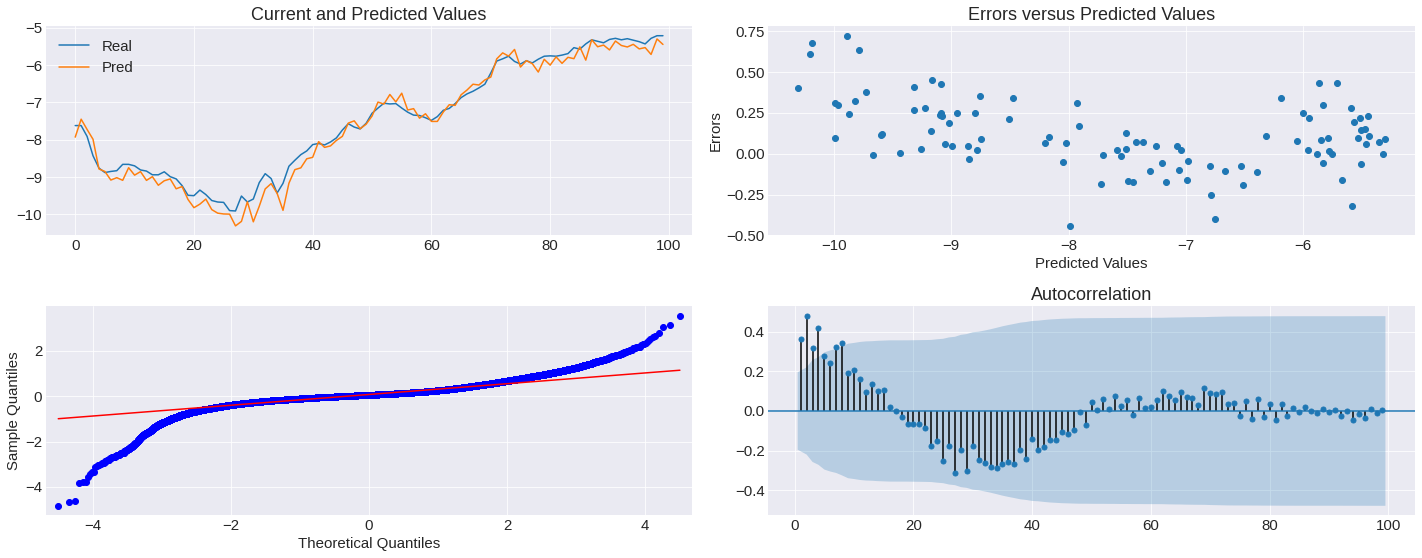

In [40]:
# Train data Performance by LSTM Model
train_RMSE_LSTM=model_performance(model1,X_train_scaled,y_train,start=0,end=100)

Analyzing the plots above we can see that the predictions fit very well on the current values.

The Error vs Predicted values has a linear distribution (the errors are between -1.5 and +1.5 while the temperature increases).

The QQ Plot shows a normal pattern with some little outliers and,

The autocorrelation plot shows a positive spike over the confidence interval just above the second lag, but I believe that there is no need for more changes.

The Root Mean Squared Error Of model prediction is :0.2379978888960144


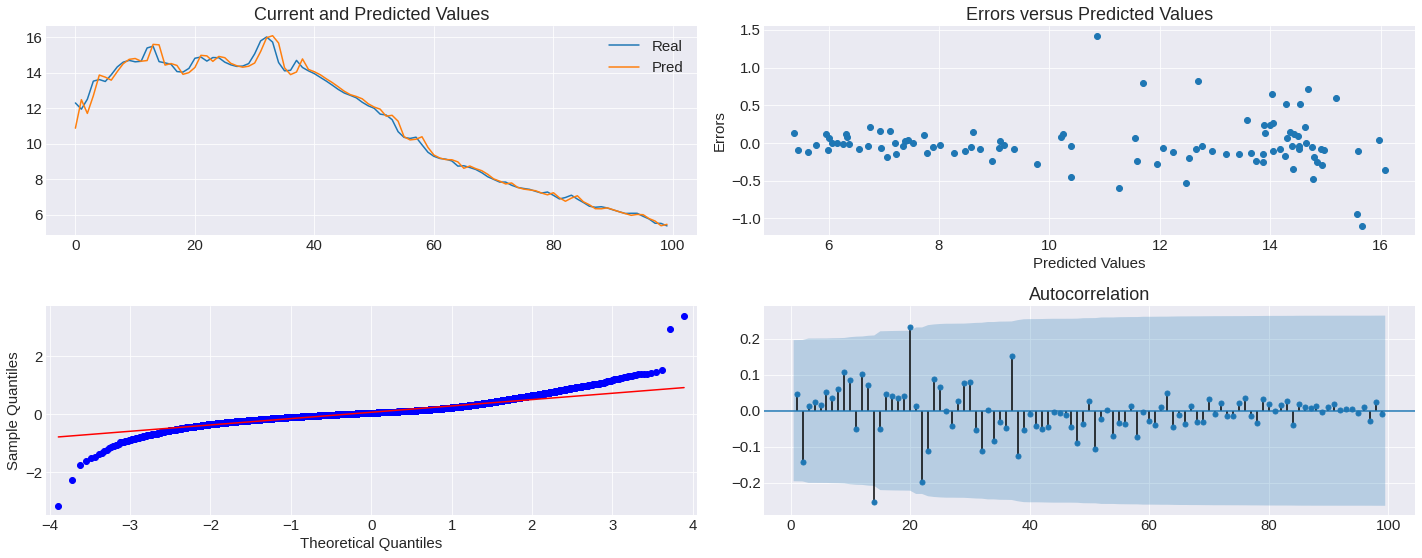

In [41]:
# Test data Performance by LSTM model 
test_RMSE_LSTM=model_performance(model1,X_test_scaled,y_test,start=0,end=100)

In [42]:
# creating dataframe to store the result of every models 
model=[]
RMSE_train=[]
RMSE_val=[]
RMSE_test=[]

val_RMSE_model1=history1.history['val_root_mean_squared_error']
val_RMSE_LSTM=min(val_RMSE_model1)

model.append('LSTM')
RMSE_train.append(train_RMSE_LSTM)
RMSE_val.append(val_RMSE_LSTM)
RMSE_test.append(test_RMSE_LSTM)



#### Convolutional Neural Network - CNN 

Convolutional Neural Network models, or CNNs for short, can be applied to time series forecasting.<br>

There are many methods for time series classification. Most of them consist of two major stages: on the first stage you either use some algorithm for measuring the difference between time series that you want to classify (dynamic time warping is a well-known one) or you use whatever tools are at your disposal (simple statistics, advanced mathematical methods etc.) to represent your time series as feature vectors. In the second stage we use some algorithm to classify the data. It can be anything from k-nearest neighbors and SVMs to deep neural network models. But one thing unites these methods: they all require some kind of feature engineering as a separate stage before classification is performed.

Fortunately, there are models that not only incorporate feature engineering in one framework, but also eliminate any need to do it manually. They are able to extract features and create informative representations of time series automatically. These models are recurrent and convolutional neural networks (CNNs).

Let's take a time series of length n and width k. The length is the number of timesteps, and the width is the number of variables in a multivariate time series. For example, for a weather time series it can be such variables as temperature, pressure, humidity etc.

The convolution kernels always have the same width as the time series, while their length can be varied. This way, the kernel moves in one direction from the beginning of a time series towards its end, performing convolution. It does not move to the left or to the right as it does when the usual 2-D convolution is applied to images.


<p align="center">
  <img src="https://miro.medium.com/max/700/1*iJyzEak-RGfpcBC9v-8oAg.png" alt="1-D Convolution for Time Series"/>
  <br>
  <em>1-D Convolution for Time Series</em>
  
</p>





In [43]:
# Convolutiona Network Model
model2=Sequential()
model2.add(InputLayer((6,4))) # 5 is window size and 1 is output 
model2.add(Conv1D(64,kernel_size=2))#,activation='relu'))
#model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             576       
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2568      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,153
Trainable params: 3,153
Non-trainable params: 0
_________________________________________________________________


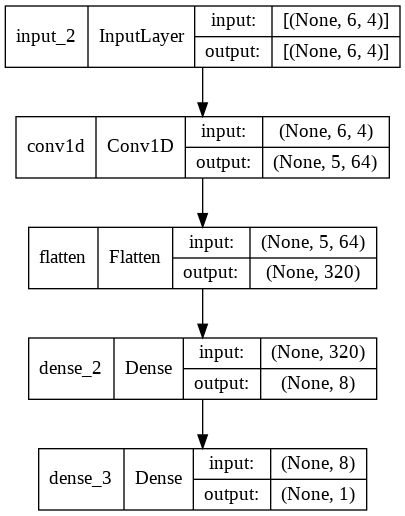

In [44]:
# Model 2 network
plot_model(model2, to_file='model2_plot.png',show_shapes=True)

In [45]:
# Setting callbacks and compiling model
cp2=ModelCheckpoint('model2/',save_best_only=True)
model2.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [46]:
# Setting model
history2=model2.fit(X_train_scaled,y_train,validation_data=(X_val_scaled,y_val),epochs=10,callbacks=[cp2])

Epoch 1/10
9371/9375 [============================>.] - ETA: 0s - loss: 212.0214 - root_mean_squared_error: 14.5610INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


9375/9375 [==============================] - 22s 2ms/step - loss: 211.9311 - root_mean_squared_error: 14.5579 - val_loss: 0.4123 - val_root_mean_squared_error: 0.6421
Epoch 2/10
9373/9375 [============================>.] - ETA: 0s - loss: 0.5655 - root_mean_squared_error: 0.7520INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


9375/9375 [==============================] - 21s 2ms/step - loss: 0.5655 - root_mean_squared_error: 0.7520 - val_loss: 0.4068 - val_root_mean_squared_error: 0.6378
Epoch 3/10
9375/9375 [==============================] - 23s 2ms/step - loss: 0.4289 - root_mean_squared_error: 0.6549 - val_loss: 0.7493 - val_root_mean_squared_error: 0.8656
Epoch 4/10
9373/9375 [============================>.] - ETA: 0s - loss: 0.3706 - root_mean_squared_error: 0.6088INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


9375/9375 [==============================] - 24s 3ms/step - loss: 0.3706 - root_mean_squared_error: 0.6087 - val_loss: 0.1797 - val_root_mean_squared_error: 0.4239
Epoch 5/10
9375/9375 [==============================] - ETA: 0s - loss: 0.3371 - root_mean_squared_error: 0.5806INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


9375/9375 [==============================] - 23s 2ms/step - loss: 0.3371 - root_mean_squared_error: 0.5806 - val_loss: 0.1490 - val_root_mean_squared_error: 0.3860
Epoch 6/10
9375/9375 [==============================] - 26s 3ms/step - loss: 0.3191 - root_mean_squared_error: 0.5649 - val_loss: 0.8195 - val_root_mean_squared_error: 0.9052
Epoch 7/10
9375/9375 [==============================] - 21s 2ms/step - loss: 0.2829 - root_mean_squared_error: 0.5319 - val_loss: 0.1781 - val_root_mean_squared_error: 0.4220
Epoch 8/10
9375/9375 [==============================] - 23s 2ms/step - loss: 0.2565 - root_mean_squared_error: 0.5065 - val_loss: 0.2365 - val_root_mean_squared_error: 0.4863
Epoch 9/10
9375/9375 [==============================] - 22s 2ms/step - loss: 0.2212 - root_mean_squared_error: 0.4703 - val_loss: 0.4006 - val_root_mean_squared_error: 0.6329
Epoch 10/10
9362/9375 [============================>.] - ETA: 0s - loss: 0.1956 - root_mean_squared_error: 0.4423INFO:tensorflow:Assets 

INFO:tensorflow:Assets written to: model2/assets


9375/9375 [==============================] - 23s 2ms/step - loss: 0.1955 - root_mean_squared_error: 0.4422 - val_loss: 0.1158 - val_root_mean_squared_error: 0.3403


In [47]:
# Choosing best model from saved models
model2=load_model('model2/')

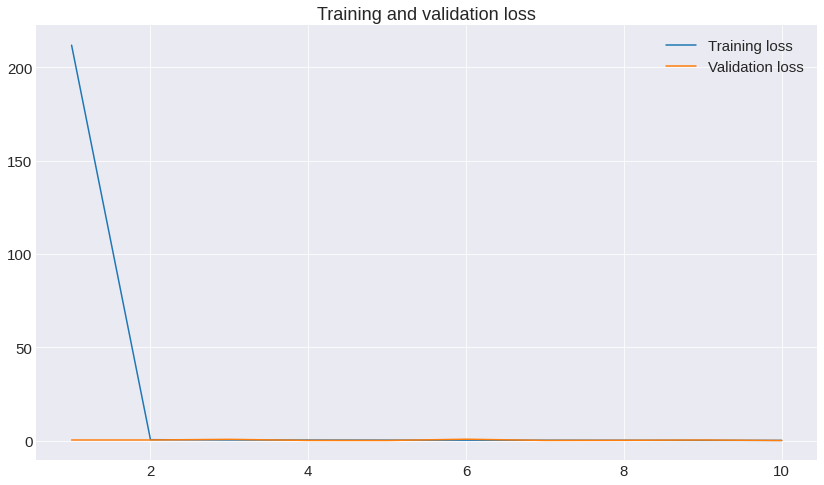

In [48]:
# Training and validation losses
train_val_loss_plot(history2)

The Root Mean Squared Error Of model prediction is :0.33163083352938355


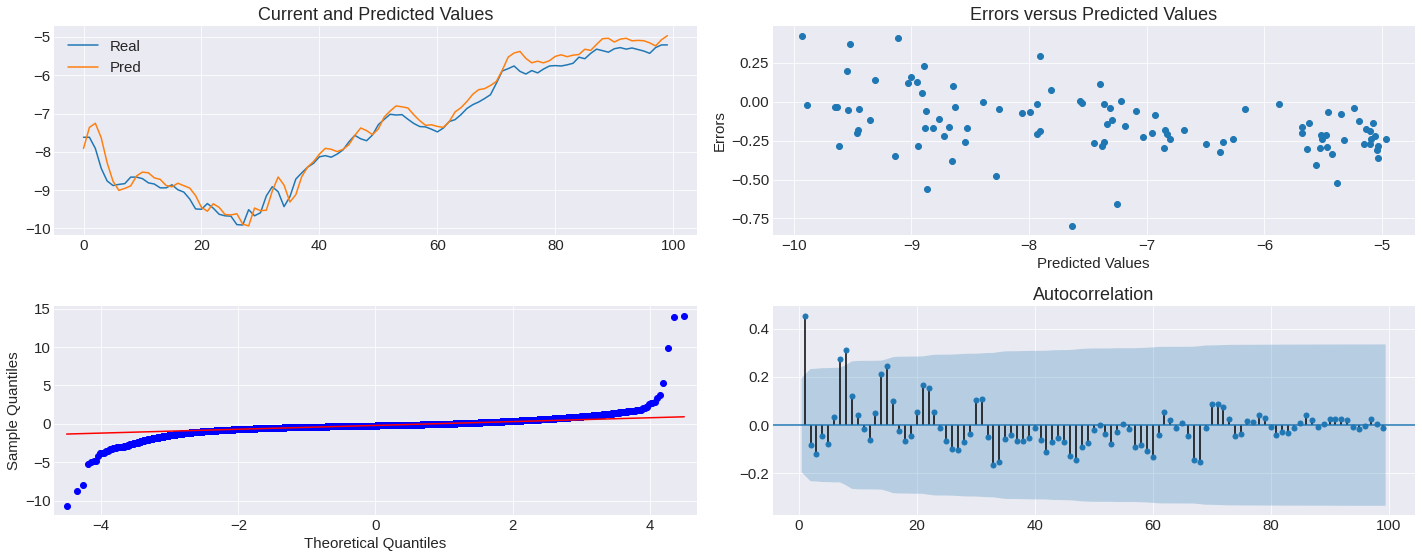

In [49]:
# CNN model performance on training data
train_RMSE_CNN=model_performance(model2,X_train_scaled,y_train)

The Root Mean Squared Error Of model prediction is :0.35117514500778163


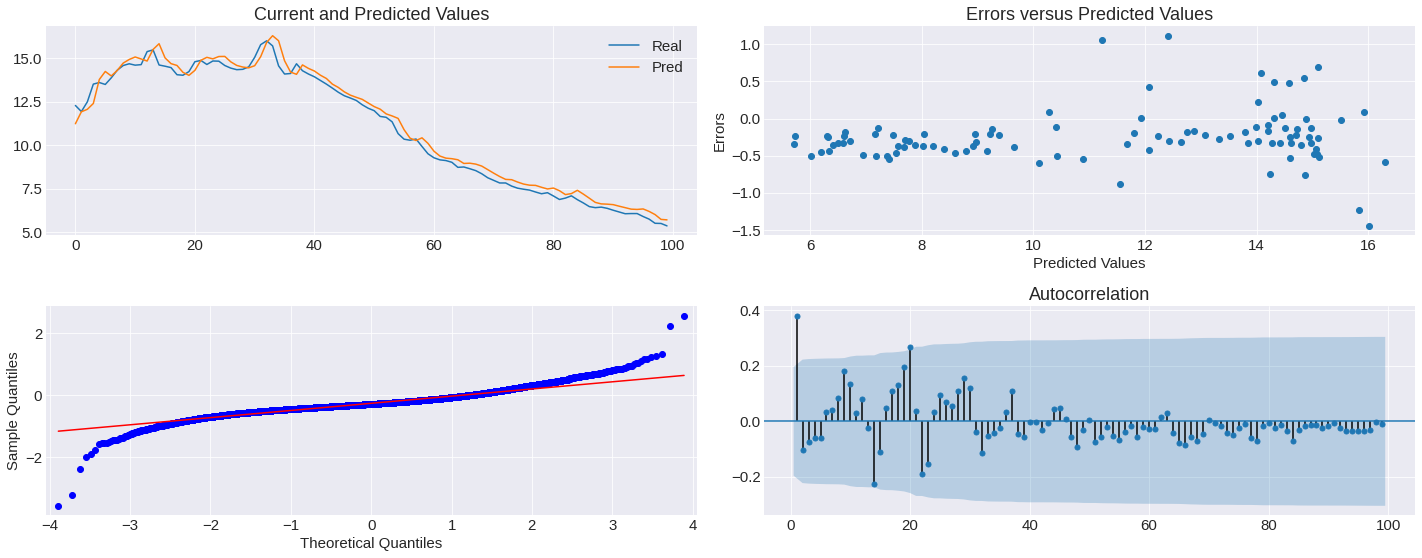

In [50]:
# CNN model performance on test data
test_RMSE_CNN=model_performance(model2,X_test_scaled,y_test)

In [51]:
val_RMSE_model2=history2.history['val_root_mean_squared_error']
val_RMSE_CNN=min(val_RMSE_model2)

model.append('CNN')
RMSE_train.append(train_RMSE_CNN)
RMSE_val.append(val_RMSE_CNN)
RMSE_test.append(test_RMSE_CNN)

#### Gated Recurrent Unit - GRU

**What is Gated Recurrent Unit- GRU?**
- GRU is an improvised version of Recurrent Neural Network(RNN).
- Addresses the vanishing gradient problem of RNN.
- GRU is capable of learning long term dependencies.

**Why GRU**<br>
Exploding Gradient can be resolved using gradient clipping. In gradient clipping, we set a pre-determined gradient threshold and when the gradients exceed this threshold we scale the gradient to the threshold.
Vanishing Gradients is addressed either Long Short Term Memory(LSTM) or Gated Recurrent Unit(GRU).

GRU like LSTM is capable of learning long term dependencies.<br>

GRU and LSTM both have a gating mechanism to regulate the flow of information like remembering the context over multiple time steps. They keep track of what information from past can be kept what can be forgotten. To achieve this GRU uses Update gate and Reset gate

GRU has separate reset and update gates, each unit will learn to capture dependencies over different time scales. Units that learn to capture short-term dependencies will tend to have reset gates that are frequently active. Units that capture longer-term dependencies will have update gates that are most active

</p>

<p align="center">
  <img src="https://miro.medium.com/max/700/1*PMtuM8762qGYdFCjOijwBQ.png" alt="Gated Recurrent Unit- GRU"/>
  <br>
  <em>Gated Recurrent Unit- GRU</em>
  
</p>

In [52]:
#Gated recurrent  Network Model
model3=Sequential()
model3.add(InputLayer((6,4))) # 5 is window size and 1 is output 
model3.add(GRU(64))
model3.add(Flatten())
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                13440     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,969
Trainable params: 13,969
Non-trainable params: 0
_________________________________________________________________


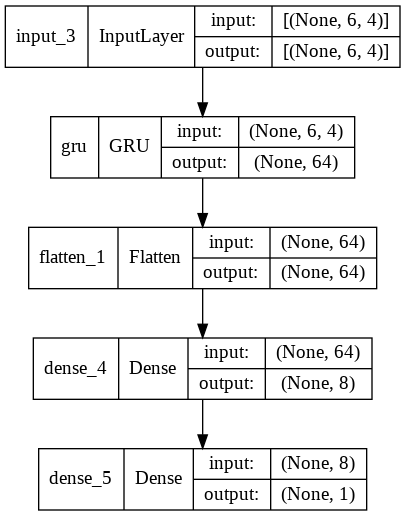

In [53]:
plot_model(model3,to_file='model3_plot.png', show_shapes=True)

In [54]:
# Setting callbacks and compiling model
cp3=ModelCheckpoint('model3/',save_best_only=True)
model3.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [55]:
# Setting model
history3=model3.fit(X_train_scaled,y_train,validation_data=(X_val_scaled,y_val),epochs=10,callbacks=[cp3])

Epoch 1/10
9373/9375 [============================>.] - ETA: 0s - loss: 33.3478 - root_mean_squared_error: 5.7748

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


9375/9375 [==============================] - 60s 6ms/step - loss: 33.3416 - root_mean_squared_error: 5.7742 - val_loss: 2.4883 - val_root_mean_squared_error: 1.5774
Epoch 2/10
9372/9375 [============================>.] - ETA: 0s - loss: 1.1051 - root_mean_squared_error: 1.0512

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


9375/9375 [==============================] - 55s 6ms/step - loss: 1.1049 - root_mean_squared_error: 1.0511 - val_loss: 0.2401 - val_root_mean_squared_error: 0.4900
Epoch 3/10
9369/9375 [============================>.] - ETA: 0s - loss: 0.2451 - root_mean_squared_error: 0.4951

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


9375/9375 [==============================] - 52s 6ms/step - loss: 0.2450 - root_mean_squared_error: 0.4950 - val_loss: 0.1566 - val_root_mean_squared_error: 0.3957
Epoch 4/10
9364/9375 [============================>.] - ETA: 0s - loss: 0.1552 - root_mean_squared_error: 0.3939

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


9375/9375 [==============================] - 52s 6ms/step - loss: 0.1551 - root_mean_squared_error: 0.3938 - val_loss: 0.1007 - val_root_mean_squared_error: 0.3174
Epoch 5/10
9375/9375 [==============================] - 48s 5ms/step - loss: 0.1207 - root_mean_squared_error: 0.3474 - val_loss: 0.1265 - val_root_mean_squared_error: 0.3557
Epoch 6/10
9375/9375 [==============================] - 53s 6ms/step - loss: 0.1059 - root_mean_squared_error: 0.3255 - val_loss: 0.2175 - val_root_mean_squared_error: 0.4663
Epoch 7/10
9375/9375 [==============================] - 47s 5ms/step - loss: 0.0957 - root_mean_squared_error: 0.3093 - val_loss: 0.1117 - val_root_mean_squared_error: 0.3342
Epoch 8/10
9371/9375 [============================>.] - ETA: 0s - loss: 0.0926 - root_mean_squared_error: 0.3043

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


9375/9375 [==============================] - 51s 5ms/step - loss: 0.0926 - root_mean_squared_error: 0.3043 - val_loss: 0.0792 - val_root_mean_squared_error: 0.2814
Epoch 9/10
9365/9375 [============================>.] - ETA: 0s - loss: 0.0898 - root_mean_squared_error: 0.2996

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


9375/9375 [==============================] - 51s 5ms/step - loss: 0.0898 - root_mean_squared_error: 0.2997 - val_loss: 0.0691 - val_root_mean_squared_error: 0.2629
Epoch 10/10
9375/9375 [==============================] - 52s 6ms/step - loss: 0.0889 - root_mean_squared_error: 0.2981 - val_loss: 0.0756 - val_root_mean_squared_error: 0.2750


In [56]:
model3=load_model('model3/')

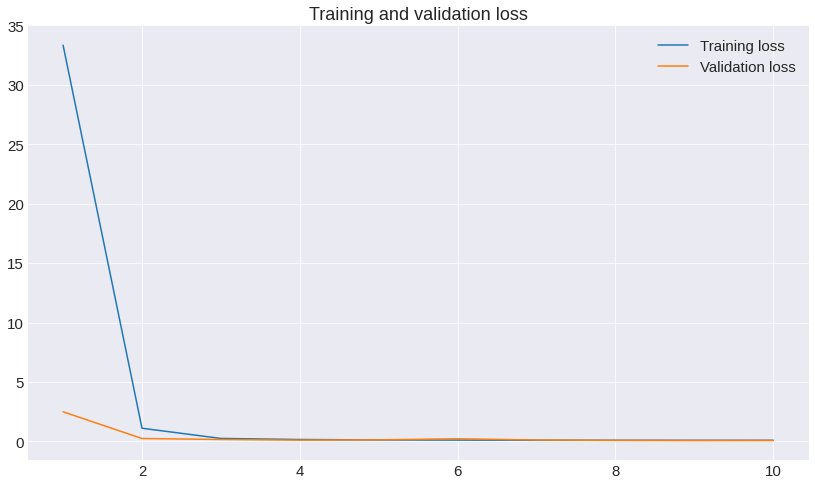

In [57]:
train_val_loss_plot(history3)

The Root Mean Squared Error Of model prediction is :0.2685105896211705


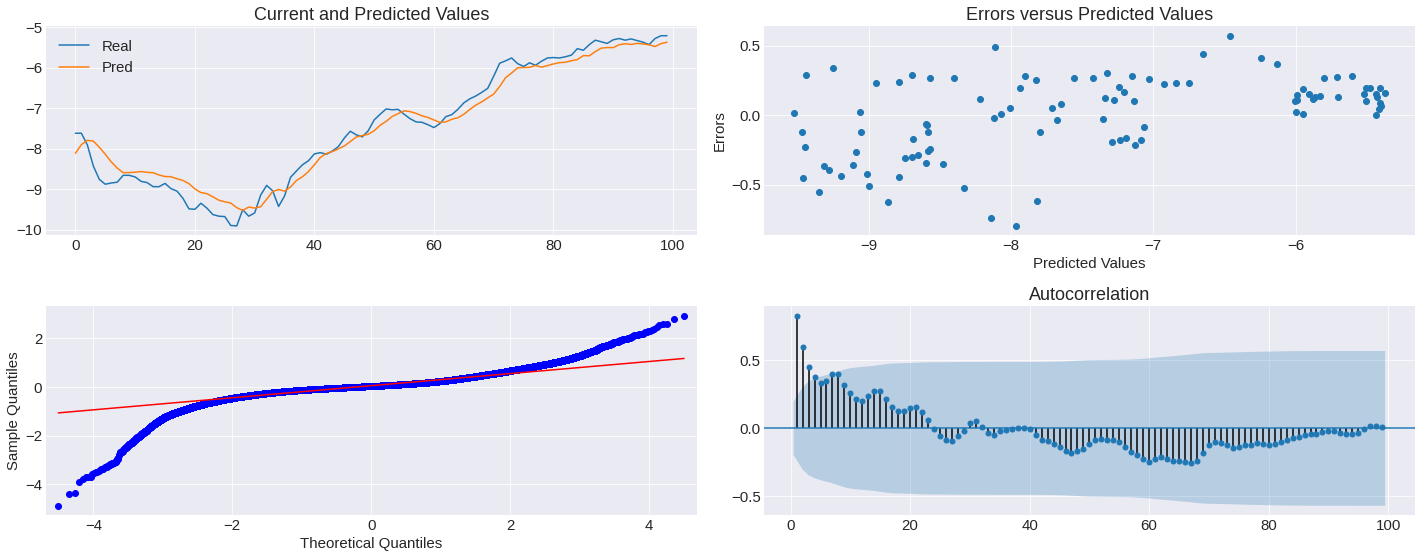

In [58]:
# GRU training data performance
train_RMSE_GRU=model_performance(model3,X_train_scaled,y_train)

The Root Mean Squared Error Of model prediction is :0.2451319734857205


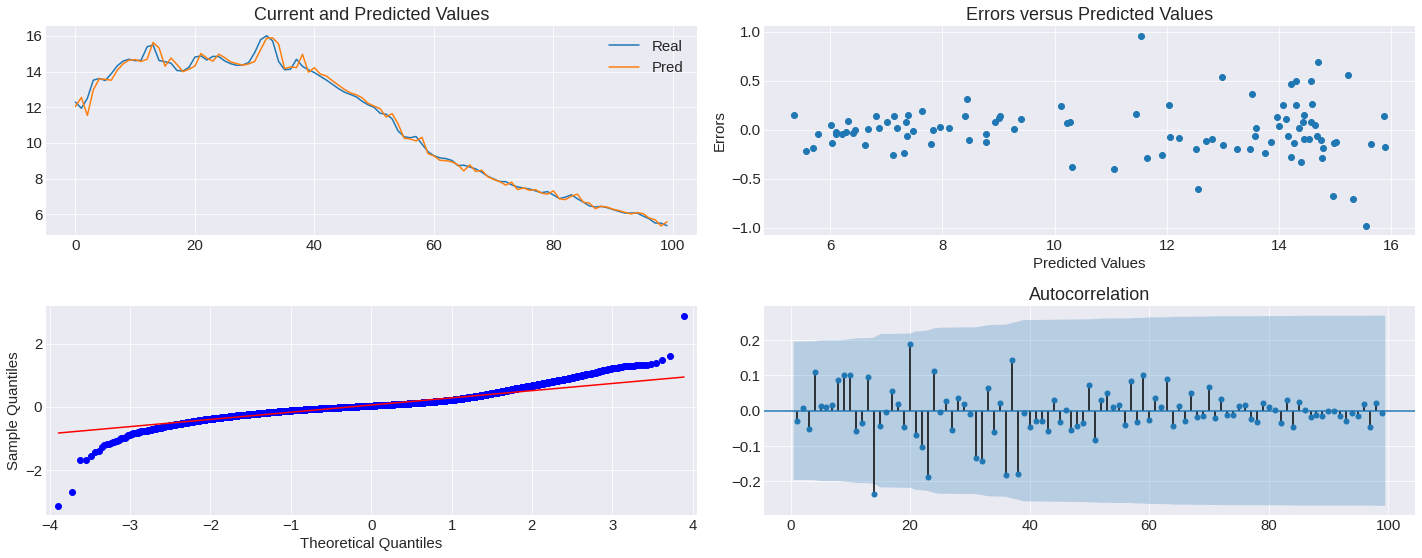

In [59]:
# GRU testing data performance
test_RMSE_GRU=model_performance(model3,X_test_scaled,y_test)

In [60]:
val_RMSE_model3=history3.history['val_root_mean_squared_error']
val_RMSE_GRU=min(val_RMSE_model3)

model.append('GRU')
RMSE_train.append(train_RMSE_GRU)
RMSE_val.append(val_RMSE_GRU)
RMSE_test.append(test_RMSE_GRU)

### <center>Summary</center>

In [62]:
 # Summary of all models:
results=pd.DataFrame(data={"Model":model,"Train RMSE":RMSE_train,"Val RMSE":RMSE_val,"Test RMSE":RMSE_test})
results

,Model,Train RMSE,Val RMSE,Test RMSE
0,LSTM,0.262661,0.261583,0.237998
1,CNN,0.331631,0.340288,0.351175
2,GRU,0.268511,0.262868,0.245132


**All the models perform similar in RMSE**

### <center>Conclusion</center>

In [63]:
# forecsting using best model
n_future=150
n_past=6
forecast_period=pd.date_range(list(dates)[-n_past],periods=n_future, freq='10min').tolist()
#pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()


In [64]:
# Creating prediction by using model 1 -LSTM
prediction_future=model1.predict(X_test[-n_future:])

In [78]:
future_pd=pd.DataFrame()
future_pd['Date']=forecast_period
future_pd['Temprature']=prediction_future
future_pd.sample(10)

,Date,Temprature
116,2017-01-01 18:20:00,-0.597774
84,2017-01-01 13:00:00,1.535755
37,2017-01-01 05:10:00,-5.295525
80,2017-01-01 12:20:00,-0.615623
144,2017-01-01 23:00:00,-3.853817
122,2017-01-01 19:20:00,-0.987027
127,2017-01-01 20:10:00,-1.446866
96,2017-01-01 15:00:00,5.035093
100,2017-01-01 15:40:00,4.248878
27,2017-01-01 03:30:00,-3.912462


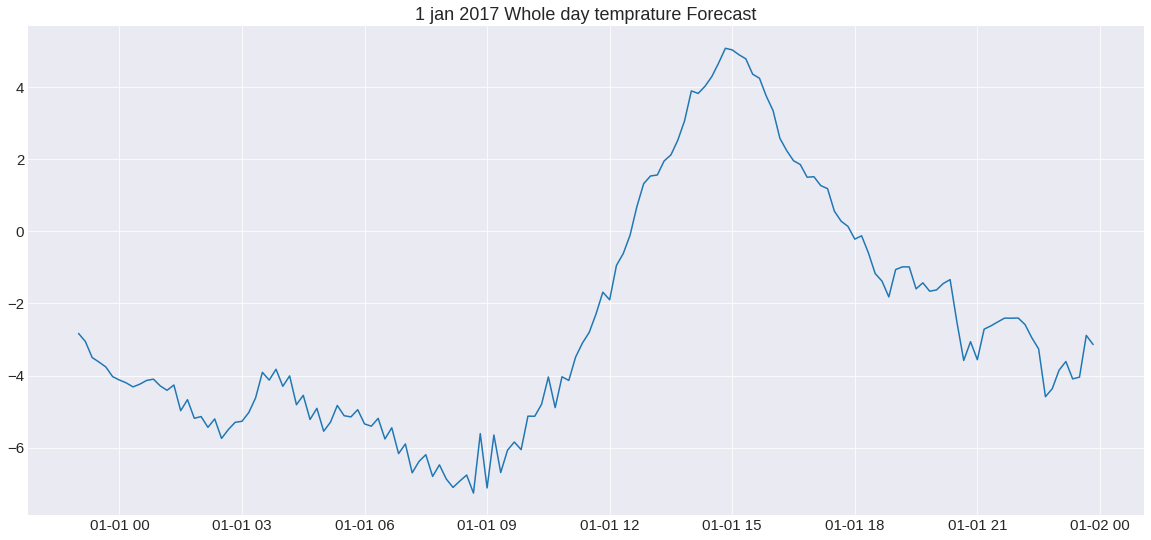

In [74]:
plt.figure(figsize=(20,9))
plt.plot(forecast_period,prediction_future)
plt.title('1 jan 2017 Whole day temprature Forecast')
plt.show()